In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Carregar os dados
df_crime = pd.read_csv(r'C:\Users\elome\OneDrive\Desktop\DGU 42\CSV\BancoVDE 2024.csv', sep =';')
df_trab = pd.read_csv(r'C:\Users\elome\OneDrive\Desktop\DGU 42\DADOS SOBRE CONDIÇÕES DE TRABALHO NO BRASIL EM 2023.csv', sep=';')

# Normalizar os nomes das colunas
df_trab = df_trab.rename(columns={
    'UF': 'uf',
    'Taxa de participaçao (%)': 'taxa_participacao',
    'Nivel de ocupaçao (%)': 'nivel_ocupacao',
    'Taxa de formalizaçao (%)': 'taxa_formalizacao',
    'Taxa de desocupaçao (%)': 'taxa_desocupacao',
    'Taxa composta de subutilizaçao (%)': 'taxa_subutilizacao'
})

# Converter a coluna data_referencia para datetime
df_crime['data_referencia'] = pd.to_datetime(df_crime['data_referencia'])
df_crime.columns


C:\Users\elome\AppData\Local\Temp\ipykernel_9832\53068974.py:10: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crime = pd.read_csv(r'C:\Users\elome\OneDrive\Desktop\DGU 42\CSV\BancoVDE 2024.csv', sep =';')


Index(['uf', 'municipio', 'evento', 'data_referencia', 'arma', 'faixa_etaria',
       'feminino', 'masculino'],
      dtype='object')

In [3]:
# Criando o dicionário com os nomes dos estados em formato título sem acentos
estados_dict = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amazonas': 'AM',
    'Amapa': 'AP',
    'Bahia': 'BA',
    'Ceara': 'CE',
    'Distrito Federal': 'DF',
    'Goias': 'GO',
    'Maranhao': 'MA',
    'Minas Gerais': 'MG',
    'Mato Grosso do Sul': 'MS',
    'Mato Grosso': 'MT',
    'Para': 'PA',
    'Paraiba': 'PB',
    'Pernambuco': 'PE',
    'Piaui': 'PI',
    'Parana': 'PR',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rondonia': 'RO',
    'Roraima': 'RR',
    'Rio Grande do Sul': 'RS',
    'Santa Catarina': 'SC',
    'Sergipe': 'SE',
    'Sao Paulo': 'SP',
    'Tocantins': 'TO',
    'Espirito Santo': 'ES'
}

df_trab['uf'] = df_trab['uf'].map(estados_dict)


In [4]:
df_crime.columns
df_crime.head()
df_crime.size
df_crime.shape

(691032, 8)

In [ ]:
df_trab = df_trab.rename(columns={'UF': 'uf'})
df_trab.columns
df_trab.head()

Index(['uf', 'Taxa de participaçao (%)', 'Nivel de ocupaçao (%)',
       'Taxa de formalizaçao (%)', 'Taxa de desocupaçao (%)',
       'Taxa composta de subutilizaçao (%)'],
      dtype='object')

In [29]:
crime_agregado = df_crime.groupby(['uf']).agg({
    'evento': 'count'
}).reset_index()



In [1]:
df_combinado = pd.merge(crime_agregado, df_trab, on='uf', how='left')
df_combinado.head()

NameError: name 'pd' is not defined

uf                    object
evento                 int64
taxa_participacao     object
nivel_ocupacao        object
taxa_formalizacao     object
taxa_desocupacao      object
taxa_subutilizacao    object
dtype: object
Tipos de dados após conversão:
uf                     object
evento                  int64
taxa_participacao     float64
nivel_ocupacao        float64
taxa_formalizacao     float64
taxa_desocupacao      float64
taxa_subutilizacao    float64
dtype: object


<Figure size 1200x1000 with 0 Axes>

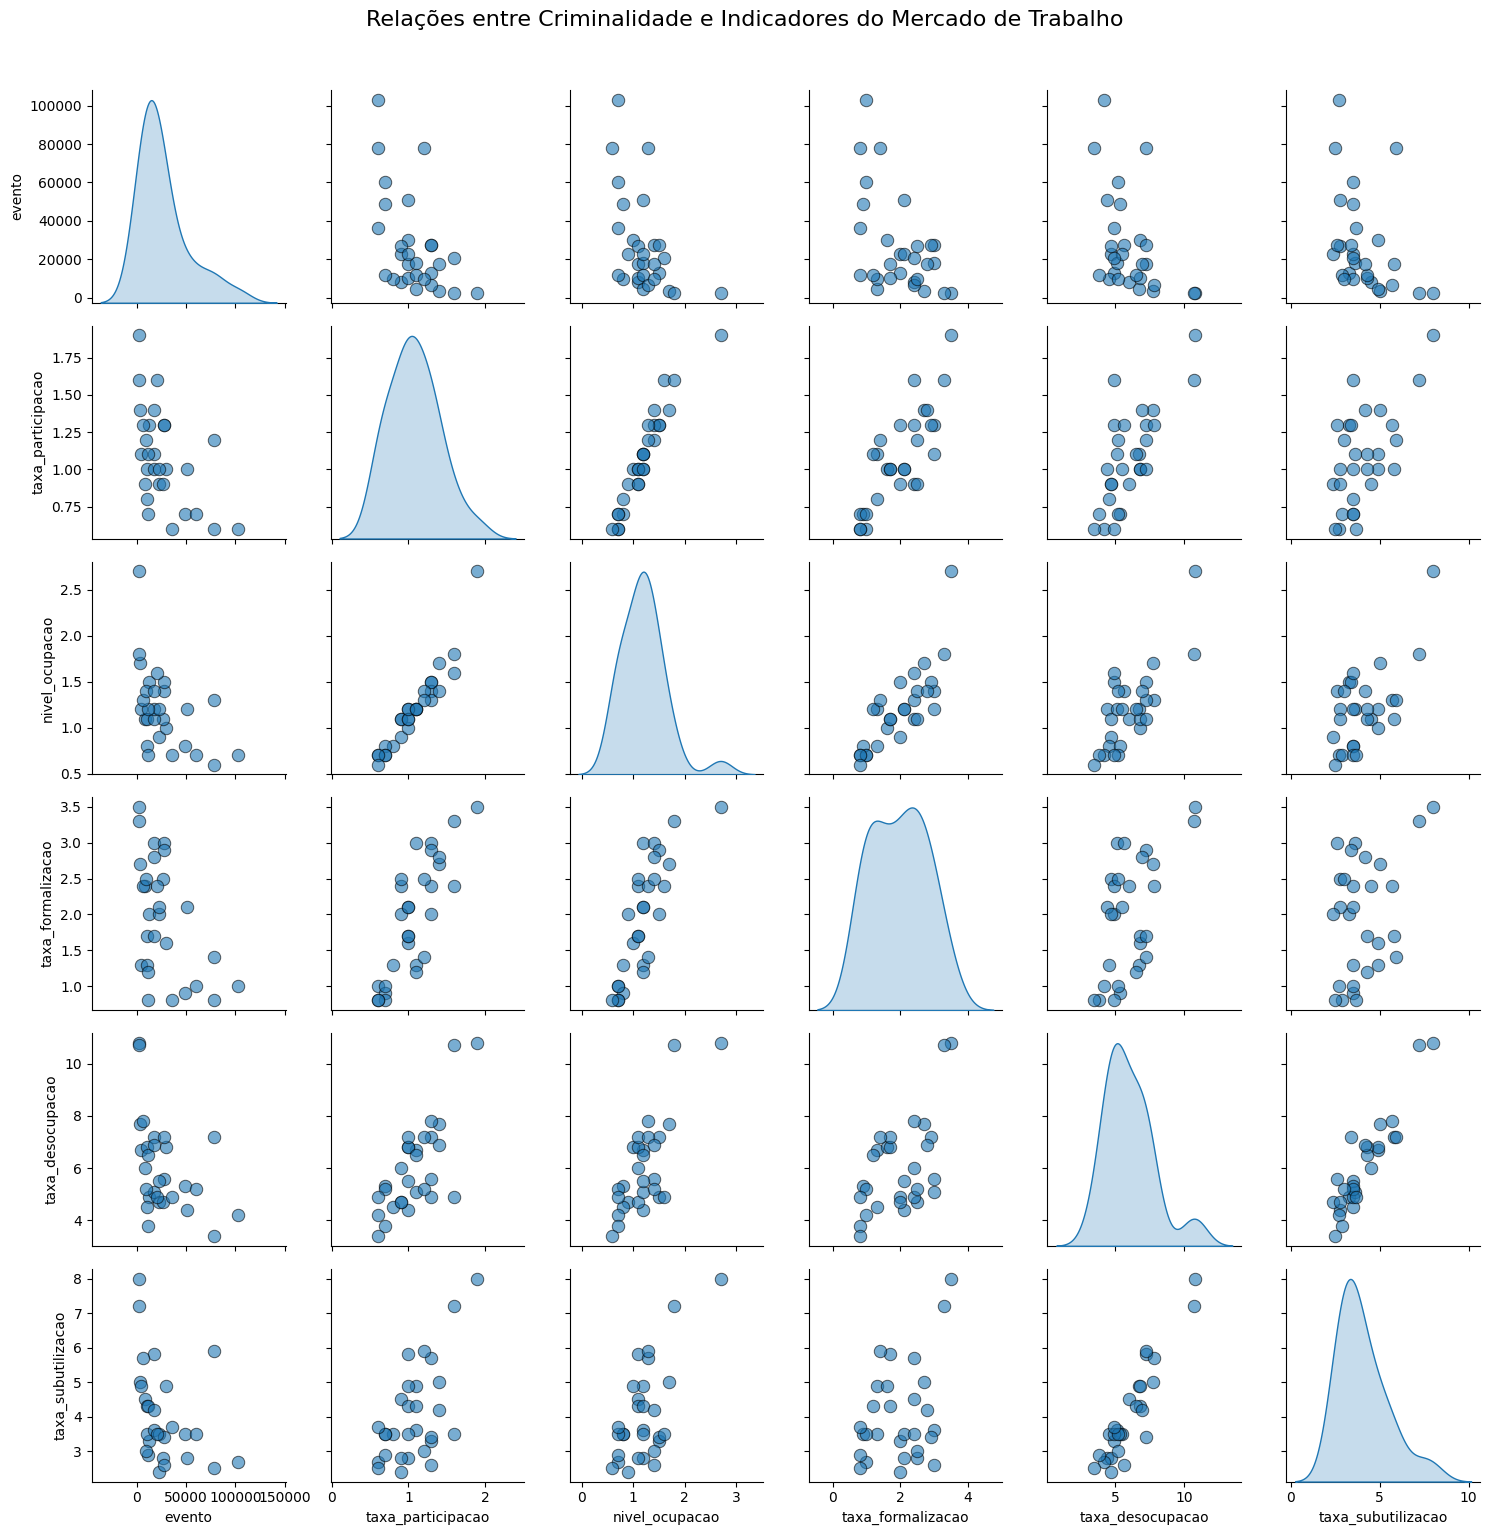


Correlações com a variável 'evento':
evento                1.000000
taxa_subutilizacao   -0.359575
taxa_desocupacao     -0.434674
nivel_ocupacao       -0.491770
taxa_formalizacao    -0.510364
taxa_participacao    -0.525867
Name: evento, dtype: float64


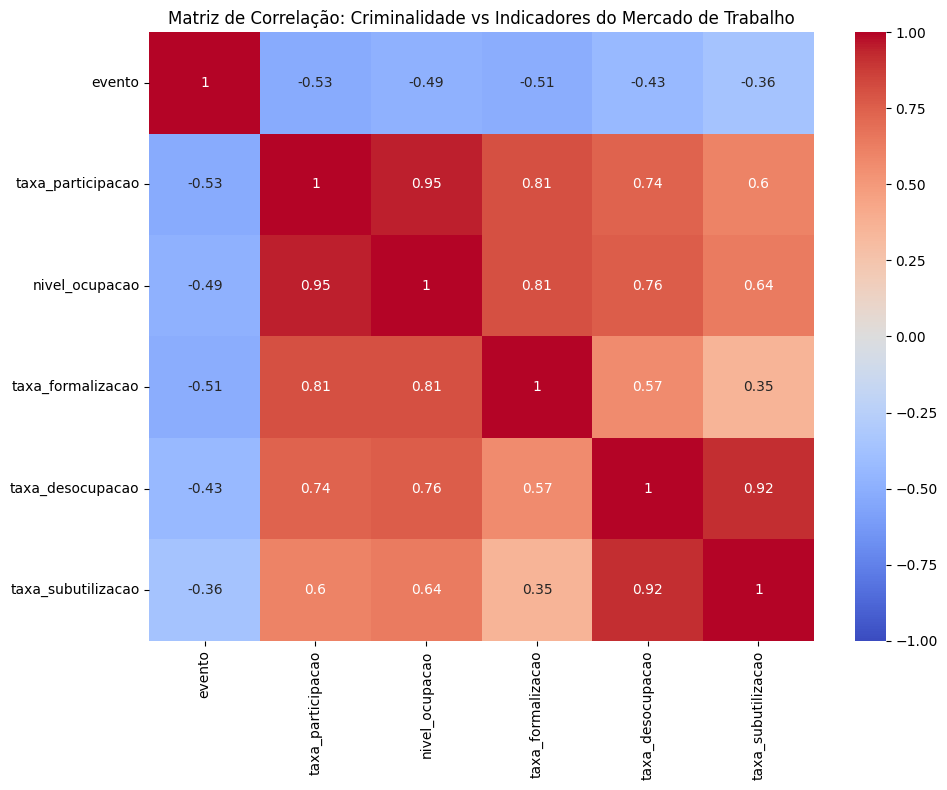

In [41]:
# Verificar o tipo de dados das colunas numéricas
print(df_combinado.dtypes)

# Converter as colunas com dados numéricos que estão em formato de string
colunas_numericas = ['taxa_participacao', 'nivel_ocupacao', 'taxa_formalizacao', 'taxa_desocupacao', 'taxa_subutilizacao']

for coluna in colunas_numericas:
    if coluna in df_combinado.columns:
        # Verificar se a coluna é do tipo objeto (string)
        if df_combinado[coluna].dtype == 'object':
            # Substituir vírgula por ponto e converter para float
            df_combinado[coluna] = df_combinado[coluna].str.replace(',', '.').astype(float)

# Verificar novamente os tipos de dados
print("Tipos de dados após conversão:")
print(df_combinado.dtypes)

# Agora criar o pairplot com os dados convertidos
colunas_para_analise = ['evento'] + colunas_numericas
colunas_existentes = [col for col in colunas_para_analise if col in df_combinado.columns]

# Remover linhas com valores nulos nas colunas de interesse
df_analise = df_combinado[colunas_existentes].dropna()

# Criar o pairplot
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df_analise, 
                       height=2.5,
                       plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                       diag_kind='kde')

pairplot.fig.suptitle('Relações entre Criminalidade e Indicadores do Mercado de Trabalho', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Agora calcular a matriz de correlação
matriz_correlacao = df_analise.corr()
print("\nCorrelações com a variável 'evento':")
print(matriz_correlacao['evento'].sort_values(ascending=False))

# Heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação: Criminalidade vs Indicadores do Mercado de Trabalho')
plt.tight_layout()
plt.show()